# Deep Learning for Computer Vision

---

**Goethe University Frankfurt am Main**

Winter Semester 2022/23

<br>

## *Assignment 1 (k-Nearest Neighbor)*

---

**Points:** 40<br>
**Due:** 2.11.2022, 10 am<br>
**Contact:** Matthias Fulde ([fulde@cs.uni-frankfurt.de](mailto:fulde@cs.uni-frankfurt.de))<br>

---

**Your Name:** Maximilian Althaus 7162860

<br>

<br>

## Table of Contents

---

- [1 Metrics](#1-Metrics-(10-Points))
  - [1.1 Manhattan Distance](#1.1-Manhattan-Distance-(3-Points))
  - [1.2 Euclidean Distance](#1.2-Euclidean-Distance-(7-Points))
- [2 Image Classification](#2-Image-Classification-(15-Points))
  - [2.1 Preparation](#2.1-Preparation-(1-Point))
  - [2.2 Implementation](#2.2-Implementation-(7-Points))
  - [2.3 Validation](#2.3-Validation-(7-Points))
- [3 Preprocessing](#3-Preprocessing-(15-Points))
  - [3.1 Image Filtering](#3.1-Image-Filtering-(4-Points))
  - [3.2 Principal Component Analysis](#3.2-Principal-Component-Analysis-(11-Points))


<br>

## Setup

---

In this notebook we use the libraries **Matplotlib**, **NumPy** and **OpenCV**. We recommend to use at least the 3.x versions of OpenCV. You can check your version with the statements below.

In [1]:
import numpy as np
import cv2 as cv

# Check installed OpenCV version.
cv.__version__

'4.6.0'

We want Matplotlib figures to appear within the notebook rather than inside a separate window, which is default in some environments, therefore we make use of the `%matplotlib` magic function to set the Matplotlib backend to inline.

In [2]:
import matplotlib.pyplot as plt

# Set default color map and interpolation method for images.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

%matplotlib inline

We import a utility function to load the CIFAR-10 dataset. See `data.py` for how it works.

In [3]:
from data import load_CIFAR_10

<br>

## Exercises

---

### 1 Metrics (10 Points)

---

In machine learning, both in the supervised and unsupervised learning setup, many algorithms depend in some way on measuring distances between different objects.

In general, a **metric**, or **distance function**, on a set $V$ is a function $d\colon V \times V \to [0, \infty),$ where for all $x,y,z \in V$ the following conditions are satisfied:

1. $d(x,y) = 0 \iff x = y \enspace$ (*identity*)
2. $d(x,y) = d(y,x) \enspace$ (*symmetry*)
3. $d(x,y) \leq d(x,z) + d(z,y) \enspace$ (*triangle inequality*)

An important class of metrics are those induced by a norm, which can be interpreted as the length of a vector in a vector space. In computer vision we usually deal with vectors in some finite dimensional real vector space $\mathbb{R}^D,$ and the metrics used are often those that are induced by a $p$-norm.

For vectors $\mathbf{x} \in \mathbb{R}^D$ and integers $p \in \mathbf{N}$, the $p$**-norm** is defined as

$$
    \lVert\mathbf{x}\rVert_p = \left(\sum_{i=1}^D \lvert\mathbf{x}_i\rvert^p\right)^\frac{1}{p}.
$$

<br>
For each of these norms we obtain a metric simply by measuring the length of the difference between two points, that is

$$
    d_p(\mathbf{x},\mathbf{y}) := \lVert\mathbf{x} - \mathbf{y}\rVert_p,
    \enspace
    \forall \mathbf{x},\mathbf{y} \in \mathbb{R}^D.
$$

These metrics are collectively referred to as $L^p$ distances.

<br>

### 1.2 Manhattan Distance (3 Points)

---

One such distance that is frequently used is the $L^1$ distance, also known as **Manhattan distance**, which is defined as the sum of the absolute values of the difference between two vectors. So we have

$$
    d_1(\mathbf{x},\mathbf{y})
    :=
    \lVert\mathbf{x} - \mathbf{y}\rVert_1
    =
    \sum_{i=1}^D \lvert\mathbf{x}_i - \mathbf{y}_i\rvert,
    \enspace
    \forall \mathbf{x}, \mathbf{y} \in \mathbb{R}^D.
$$

This can be conceived as defining a space where it's only possible to move in right angles parallel to the coordinate axes.

<br>

#### 1.1.1 Task

Consider two design matrices $\mathbf{X} \in \mathbb{R}^{N \times D}$ and $\mathbf{Y} \in \mathbb{R}^{M \times D}$, where each row represents a *sample* and each column is a *feature*. We want to compute the pairwise $L^1$ distances between the samples in $\mathbf{X}$ and the samples in $\mathbf{Y}$ to obtain a distance matrix $\mathbf{D} \in \mathbb{R}^{N \times M}$.

We want to do this without using loops, as this tends to slow down computation significantly. So, in order to practice vectorized, loop free programming, implement the $L^1$ distance using only NumPy operations.

Do **not** use the `norm` function provided with NumPy's linear algebra library!

<br>

#### 1.1.2 Solution

Complete the function definition below.

In [52]:
A = np.array([[1, 2],  
     [2, 1]])

B = np.array([[1, 1],
     [2, 2],
     [1, 3],
     [1, 4]])

np.abs(A[:, None] - B).sum(-1)

#np.abs(A[:,0,None] - B[:,0]) + np.abs(A[:,1,None] - B[:,1])



array([[1, 1, 1, 2],
       [1, 1, 3, 4]])

In [56]:
def d1(X, Y):
    """
    Compute L1 distances between samples in X and Y.

    Parameters:
        - X: Design matrix with shape (N, D).
        - Y: Design matrix with shape (M, D).

    Returns:
        - out: Distance matrix with shape (N, M).

    """
    ############################################################
    ###                  START OF YOUR CODE                  ###
    ############################################################

    out = np.abs(X[:, None] - Y).sum(-1)

    ############################################################
    ###                   END OF YOUR CODE                   ###
    ############################################################
    return out


<br>

### 1.2 Euclidean Distance (7 Points)

---

Another metric that is often used is the $L^2$ distance, also known as **Euclidean distance**, which can be interpreted as an application of the Pythagorean theorem, computing the length of the hypotenuse in a right triangle. It is defined as

$$
    d_2(\mathbf{x},\mathbf{y})
    =
    \lVert\mathbf{x} - \mathbf{y}\rVert_2
    =
    \sqrt{\sum_{i=1}^D \left(\mathbf{x} - \mathbf{y}\right)_i^2},
    \enspace
    \forall \mathbf{x}, \mathbf{y} \in \mathbb{R}^D.
$$

The Euclidean distances corresponds to the length of a straight line between two points.

<br>

#### 1.2.1 Task (2 Points) 1/2

In this exercise, the goal is again to compute a distance matrix from two sets of samples, using only low-level NumPy operations. However, before we do that, we first want to transform the formula given above.

Derive a formula for the Euclidean distance that represents the term within the square root as two sums, and a dot product between the vectors $\mathbf{x}$ and $\mathbf{y}$.

<br>

#### 1.2.2 Solution

In [ ]:
'''
you should give a more detail derive process about Euclidean distance
'''

$d_2(x,y) = \sqrt{|\sum_{i=1}^{D} (( x_i^2 ) + ( y_i^2 )) -  \sum_{i=1}^{D}2x_iy_i|} $

<br>

#### 1.2.3 Task (5 Points)

Now use this result to write a fully vectorized function that computes the pairwise $L^2$ distances between two sets of observations, represented as design matrices $\mathbf{X} \in \mathbb{R}^{N \times D}$ and $\mathbf{Y} \in \mathbb{R}^{M \times D}$.

Again, implement the calculation **without** using the `norm` function of NumPy!

<br>

#### 1.2.4 Solution

Complete the function definition below.

In [198]:
def d2(X, Y):
    """
    Compute L2 distances between samples in X and Y.

    Parameters:
        - X: Design matrix with shape (N, D).
        - Y: Design matrix with shape (M, D).

    Returns:
        - out: Distance matrix with shape (N, M).

    """
    ############################################################
    ###                  START OF YOUR CODE                  ###
    ############################################################
    
    out = np.sqrt(np.abs(
                -2*np.dot(X,np.transpose(Y)) 
                + (X*X).sum(axis=1)*np.ones(shape=(2,1)) 
                + (Y*Y).sum(axis=1)*np.ones(shape=(2,1))))
    ############################################################
    ###                   END OF YOUR CODE                   ###
    ############################################################
    return out


<br>

### 2 Image Classification (15 Points)

---

The **k-nearest neighbor** (kNN) classification algorithm as described in the lecture builds on a simple non-parametric model, where the class of an image is solely determined by its distance to the samples in the training data set.

The kNN classifier consists of two stages:

- During **training**, the classifier takes the training data and simply remembers it.
- During **testing**, it categorizes a test image by comparing it to the stored training images. It selects the most common label out of the $k$ most similar training examples as its prediction.

The value of $k$ and the choice of the distance function used to compare the samples are hyperparameters of the model.

---

In this exercise we want to implement kNN and use it on the CIFAR-10 data set, which consists of $50.000$ training images and $10.000$ test images, where each sample is a small $32 \times 32$ pixel color image belonging to one of ten classes.

The first step is to load the data into main memory.

Please note that loading the complete data set into main memory and converting it to floats might exceed the memory capacity of older machines. In case you encounter problems loading the data, you should try loading a single batch first by adjusting the definition of the `load_CIFAR_10` function, which is imported from the `data.py` module.

In [179]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_CIFAR_10('datasets/cifar-10-batches-py')

In order to see how the images are stored, we print out the shape of the data sets.

In [180]:
print(
    f'Training data shape: {X_train.shape}',
    f'Training labels shape: {y_train.shape}',
    f'Test data shape: {X_test.shape}',
    f'Test labels shape: {y_test.shape}',
    sep = '\n'
)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


<br>

### 2.1 Preparation (1 Point)

Whenever we devise a machine learning algorithm, it's good practice to have a closer look at the data that we're about to use. So let's inspect the data set by selecting a random batch of five images per class.

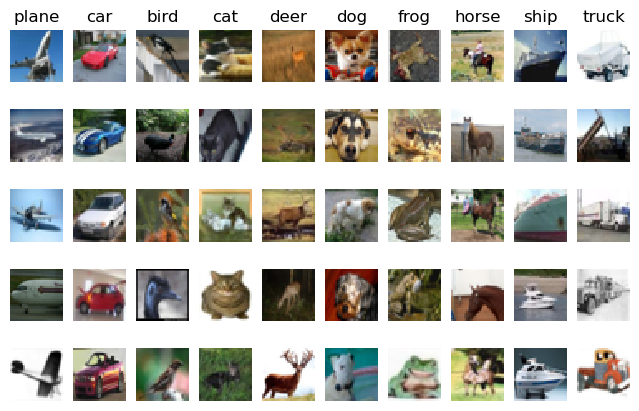

In [181]:
# Visualize some examples from the dataset.
labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = 10
num_samples = 5

figure = plt.figure(figsize=(8, 5))

for y, label in enumerate(labels):
    indices = np.random.choice(np.flatnonzero(y_train == y), num_samples, replace=False)

    # Show images in a grid with one column per class.
    for i, index in enumerate(indices):
        plt.subplot(num_samples, num_classes, i*num_classes + y + 1)
        plt.axis(False)
        plt.imshow(X_train[index].astype(np.uint8))

        if i == 0:
            plt.title(label)

plt.show()

To reduce the time for code execution in this exercise we subsample the training and test data.

In [182]:
# We use 5000 examples from the training set.
indices = np.arange(5000)

X_train = X_train[indices]
y_train = y_train[indices]

# We use 500 examples from the test set.
indices = np.arange(500)

X_test = X_test[indices]
y_test = y_test[indices]



The kNN algorithm expects the data points in the training and test set to be vectors and not tensors, so we have to convert the images to vectors before we can use them.

<br>

#### 2.1.1 Task

Complete the definition of the `to_vector` function below. The function should take a set of images shaped like the training and test data loaded before and transform each image into a vector. Use only vectorized NumPy operations.

<br>

#### 2.1.2 Solution

Fill your code in the code cell below.

In [183]:
def to_vector(images):
    """
    Transform images into vectors.
    Expects a data set where samples are stored in the first dimension.
    """
    ############################################################
    ###                  START OF YOUR CODE                  ###
    ############################################################
    
    out = images.flatten()
    out = out.reshape(images.shape[0], 3072)
    # COMMENT: next time you should try not to hard code this dimensions
    
    ############################################################
    ###                   END OF YOUR CODE                   ###
    ############################################################
    return out

Let's transform the samples for training and testing.

In [191]:
# Transform training and test images into vectors.
X_train_v = to_vector(X_train)
X_test_v  = to_vector(X_test)

print(
    f'Training data shape: {X_train_v.shape}',
    f'Test data shape: {X_test_v.shape}',
    sep='\n'
)

Training data shape: (5000, 3072)
Test data shape: (500, 3072)


<br>

### 2.2 Implementation (7 Points)

---

Now, with everything in place, we want to implement the kNN algorithm.

<br>

#### 2.2.1 Task

Complete the definition of the `predict` method below, so that it predicts labels based on the 𝑘 nearest neighbors for a given test set. In case there is more than one most common label, break ties by choosing the *smaller* label. Again, use only vectorized operations for your implementation.

<br>

#### 2.2.2 Solution

Fill your code in the cell below.

In [185]:
class KNN():

    def train(self, X, y):
        """
        Training only means to store the given training data.
        All computations are deferred to the test phase.

        Parameters:
            - X: Training data.
            - y: Training labels.

        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, d, k):
        """
        Predict labels for points in a given data set X.

        Parameters:
            - X: Test data.
            - d: Distance function.
            - k: Number of nearest neighbors.

        """
        num_test, _ = X.shape

        # Create array for predicted labels.
        y_pred = np.empty(num_test)

        # Compute distance matrix.
        distances = d(X, self.X_train)

        print(distances)
        
        for i in range(num_test):
            ############################################################
            ###                  START OF YOUR CODE                  ###
            ############################################################

            pass

            ############################################################
            ###                   END OF YOUR CODE                   ###
            ############################################################

        return y_pred

#### 2.2.3 Results

To test your implementation, you can run the following code cells.

# Unfortunately, I failed with the distance function. It was sadly too much and I didn't make it in the allocated time. :(

In [ ]:
'''
this is ok and normal to make some mistake in exercise
this is the meaning of exercise
allow you to make some mistake or misunderstand something
and learn something from it

and also spend more time on it

do not give up, looking forward to your next submit
wish you have a better note next time :P
'''

In [189]:
# Create instance of kNN classifier.
model = KNN()

# During training we only store the data.
model.train(X_train_v, y_train)

# Predict labels for test data using Euclidean distance and just the nearest neighbor.
y_pred = model.predict(X_test_v, distance.euclidean, 1)

ValueError: Input vector should be 1-D.

You should expect to see approximately $27\%$ accuracy.

In [ ]:
# Compute and print the fraction of correctly predicted examples.
num_correct = np.sum(y_pred == y_test)
num_test, _ = X_test_v.shape

print(f'Accuracy: {num_correct / num_test * 100:.2f} %')

<br>

### 2.3 Validation (7 Points)

---

To determine which value of $k$ works best for our model, we want to perform *cross validation*. So instead of separating out a dedicated validation set from our training data set to tune this hyperparameter, we select some candidate values for $k$ and for each one do the following:

- Split the training set into $n$ disjunct subsets of equal size.
- For $i$ from $1 \ldots n$:
  - Select fold $i$ as the validation set and the other $n - 1$ folds as the training set.
  - Evaluate the model with the validation set.
  - Store the accuracy of the predictions.
- Calculate the average accuracy for the current value of $k$.

Finally we select the value of $k$ that performed best and evaluate the model again with this value and the original training and test data. This is already implemented below.

<br>

#### 2.3.1 Task

Implement cross validation using the given parameters. Store the results in the `accuracies` variable such that index $i$ is a list with the accuracies obtained in all rounds for the 𝑖-th value of 𝑘. Use the Euclidean distance to compute the distance matrix.

You can use loops to iterate over the candidate values for $k$ and the number of folds $n$. The rest of the code should not contain any loops.

<br>

#### 2.3.2 Solution

Fill your code in the cell below.

In [ ]:
# Create classifier.
model = KNN()

# Set the parameters to use.
folds = 5
choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

############################################################
###                  START OF YOUR CODE                  ###
############################################################

accuracies = []

############################################################
###                   END OF YOUR CODE                   ###
############################################################

<br>

#### 2.3.3 Results

To visualize the results, run the following code.

In [ ]:
# Create figure.
figure = plt.figure(figsize=(8, 5))

# Plot the raw observations collected in the accuracies list.
for i, k in enumerate(choices):
    plt.scatter([k]*folds, accuracies[i])

# Calculate mean and standard deviation.
mean = np.array([np.mean(x) for x in accuracies])
std  = np.array([np.std(x)  for x in accuracies])

# Plot the trend line with error bars that correspond to the standard deviation.
plt.errorbar(choices, mean, yerr=std)

# Set title and label the axes.
plt.title('Cross Validation on k')
plt.xlabel('k')
plt.ylabel('accuracy')

# Display the results.
plt.show()

Now, based on the results obtained during cross validation, we choose the best value for $k$, retrain the kNN classifier using all the training data, and evaluate it on the test data.

In [ ]:
# Choose the k that worked best for our model.
best_k = choices[np.argmax(mean)]

# Show the value.
print(best_k)

# Store training data.
model.train(X_train_v, y_train)

# Predict labels for test data using Euclidean distance and the chosen k.
y_pred = model.predict(X_test_v, d2, best_k)

You should expect to see a slight increase in the model's accuracy.

In [ ]:
# Compute and print the fraction of correctly predicted examples.
num_correct = np.sum(y_pred == y_test)
num_test, _ = X_test_v.shape

print(f'Accuracy: {num_correct / num_test * 100:.2f} %')

<br>

### 3 Preprocessing (15 Points)

---

In this exercise we want to see if and how the results change if we preprocess the image data before we apply the k-nearest neighbor algorithm.

<br>

### 3.1 Image Filtering (4 Points)

---

The first thing we want to do is to apply some filters on the images that were introduced in the lecture.

<br>

#### 3.1.1 Task (2 Points)

Convert the subsampled training and test images from color to grayscale and use the [Sobel](https://docs.opencv.org/4.6.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d) method of OpenCV for bidirectional edge detection. Test different filter sizes and keep the best result. You're allowed to use a loop to apply the filter to the images.

<br>

#### 3.1.2 Solution

Fill your code in the cell below, storing the results in the given variables.

In [ ]:
############################################################
###                  START OF YOUR CODE                  ###
############################################################

X_train_p = None
X_test_p  = None

############################################################
###                   END OF YOUR CODE                   ###
############################################################

<br>

#### 3.1.3 Results

Run the following code to evaluate the model on the preprocessed data.

In [ ]:
# Convert images to vectors.
X_train_v = to_vector(X_train_p)
X_test_v  = to_vector(X_test_p)

# Store training data.
model.train(X_train_v, y_train)

# Predict labels for test data using Euclidean distance and the chosen k.
y_pred = model.predict(X_test_v, d2, best_k)

You should expect to see a significantly degraded accuracy.

In [ ]:
# Compute and print the fraction of correctly predicted examples.
num_correct = np.sum(y_pred == y_test)
num_test, _ = X_test_v.shape

print(f'Accuracy: {num_correct / num_test * 100:.2f} %')

<br>

#### 3.1.4 Task (2 Points)

Now let's try something else. Use the `GaussianBlur` method of OpenCV on the original images for smoothing with a Gaussian filter. Try different values for kernel size and standard deviation. Can you improve the accuracy compared to the original data?

<br>

#### 3.1.5 Solution

Fill your code in the cell below, storing the results in the given variables.

In [ ]:
############################################################
###                  START OF YOUR CODE                  ###
############################################################

X_train_p = None
X_test_p  = None

############################################################
###                   END OF YOUR CODE                   ###
############################################################

<br>

#### 3.1.6 Results

Run the following code to evaluate the model on the preprocessed data.

In [ ]:
# Convert images to vectors.
X_train_v = to_vector(X_train_p)
X_test_v  = to_vector(X_test_p)

# Store training data.
model.train(X_train_v, y_train)

# Predict labels for test data using Euclidean distance and the chosen k.
y_pred = model.predict(X_test_v, d2, best_k)

You should be able to get a slightly better result than using the original data.

In [ ]:
# Compute and print the fraction of correctly predicted examples.
num_correct = np.sum(y_pred == y_test)
num_test, _ = X_test_v.shape

print(f'Accuracy: {num_correct / num_test * 100:.2f} %')

<br>

### 3.2 Principal Component Analysis (11 Points)

---

When dealing with high dimensional data like images, we often find that not all dimensions are equally important to solve the task at hand. Moreover, due to the *curse of dimensionality*, samples become increasingly equidistant in high dimensional spaces, which degrades the performance of distance based algorithms like the k-nearest neighbor classifier.

In the introductory machine learning courses, **principal component analysis** (PCA) was introduced as a method to reduce the dimensionality of the data. The algorithm describes an orthogonal projection of the data onto a lower dimensional subspace, such that the variance of the projected data is maximized. In other words, PCA reduces the dimensionality of the data while retaining as much information as possible.

The orthogonal directions that convey the most information are given by the eigenvectors of the data covariance matrix, which are called principal components. We project the centered data with dimensionality $D$ onto the span of the $K < D$ eigenvectors corresponding to the $K$ largest eigenvalues of the data covariance matrix, because the eigenvalues encode the variance of the projected data.

Now, before we preprocess the dataset using PCA, we want to convince ourselves that the properties stated above are true.

<br>

#### 3.2.1 Variance Formulation (2 Points)

Consider a dataset of $N$ observations $\{\mathbf{x}_n\}_{n=1}^N$ with $\mathbf{x}_n \in \mathbb{R}^D$ and $D > 1$. The data covariance matrix is defined as

<br>

$$
    \mathbf{S}
    =
    \frac{1}{N-1} \sum_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}})(\mathbf{x}_n - \bar{\mathbf{x}})^\top
$$

where $\bar{\mathbf{x}}$ denotes the sample mean.

Show that the expression $\mathbf{v}^\top\mathbf{S}\mathbf{v}$ with $\mathbf{v} \in \mathbb{R}^D$ and $\lVert\mathbf{v}\rVert = 1$ is equal to the variance of the linear projections $\mathbf{v}^\top\mathbf{x}_n$.

##### Proof

*Write your proof here.*

<div style="text-align:right">$\square$</div>

<br>

#### 3.2.2 Principal Components (4 Points)

Show that the variance $\mathbf{v}^\top\mathbf{S}\mathbf{v}$ of the projected data is maximized if the vector $\mathbf{v}$ is the eigenvector corresponding to the largest eigenvalue of the covariance matrix $\mathbf{S}$, i.e. the first principal component.

You could do this by computing the partial derivative of $\mathbf{v}^\top\mathbf{S}\mathbf{v}$ with respect to $\mathbf{v}$ and setting the result to zero, but you have to take into account the equality constraint $\lVert\mathbf{v}\rVert = 1$. So instead of maximizing the variance directly, you can perform these steps for a [Lagrange function](https://en.wikipedia.org/wiki/Lagrange_multiplier), which we define as

$$
    \mathcal{L}(\mathbf{v}, \mathbf{S}, \lambda)
    =
    \mathbf{v}^\top\mathbf{S}\mathbf{v}
    -
    \lambda(\mathbf{v}^\top\mathbf{v} - 1).
$$

<br>

##### Proof

*Write your proof here.*

<div style="text-align:right">$\square$</div>

<br>

#### 3.2.3 Implementation (5 Points)

Now we want to apply PCA to the subsampled data of the CIFAR-10 data set and evaluate the kNN model with the transformed data. In order to do this, implement the following steps:

- Convert the training and test images to vectors.
- Compute the mean $\mu$ and standard deviation $\sigma$ per feature for both data sets.
- Normalize the data by subtracting the mean and dividing by the standard deviation.
- Compute the data covariance matrix $\mathbf{S}$ for the *training* set.
- Compute the eigenvalues $\lambda_i$ and eigenvectors $\mathbf{v}_i$ for the covariance matrix $\mathbf{S}$.
- Sort the eigenvalues in decreasing order and then sort the eigenvectors accordingly.
- Let $\mathbf{V}$ be the matrix having the $K$ eigenvectors corresponding to the $K$ largest eigenvalues as columns.
- Project both the training and test images onto the principal subspace by computing
  
  $$
      \tilde{\mathbf{X}} = \mathbf{X}\mathbf{V}.
  $$

<br>

We want to choose the number of principal components $K$ such that $95\%$ of the variance is preserved.

As we have seen above, the variance of the projected data, also called the explained variance, is given by the eigenvalues $\lambda_i$ of $\mathbf{S}$. So, in order to find a threshold for the number of components $K$, compute the percentage of variance explained by each component as

$$
    r_i = \frac{\lambda_i}{\sum_{j=1}^D \lambda_j}
$$

for $i = 1, \ldots, D$.

Accumulate the sorted and normalized eigenvalues $r_i$ until the explained variance ratio is equal to or larger than $0.95$ and use the corresponding number of components $K$ for the projection.

Implement the algorithm without loops. You can use the [cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) function from NumPy to compute tha data covariance matrix and the [eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) function for computing its eigenvalues and eigenvectors.

<br>

#### 3.2.4 Solution

Fill your solution in the code cell below, storing the results in the given variables.

In [ ]:
############################################################
###                  START OF YOUR CODE                  ###
############################################################

X_train_p = None
X_test_p  = None

############################################################
###                   END OF YOUR CODE                   ###
############################################################

<br>

#### 3.2.5 Result

Let's see how much we reduced the dimensionality of the data.  Then we'll evaluate our kNN model.

In [ ]:
# Check the shape of the projected data.
print(X_train_p.shape)

In [ ]:
# Store training data.
model.train(X_train_p, y_train)

# Predict labels for test data using Euclidean distance and the chosen k.
y_pred = model.predict(X_test_p, d2, best_k)

You should expect to see the same or even a slightly increased accuracy, though we have massively reduced the number of dimensions.

In [ ]:
# Compute and print the fraction of correctly predicted examples.
num_correct = np.sum(y_pred == y_test)
num_test, _ = X_test_v.shape

print(f'Accuracy: {num_correct / num_test * 100:.2f} %')

<br>

### Acknowledgement

Parts of this exercise are adapted from the Stanford CS231n course.